# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import os
import statsmodels.api as sm
from scipy.optimize import curve_fit


# Data

In [2]:
# STRONG SCALING

strong_scaling_MPI = pd.read_csv('../results/strong_scaling_MPI_EPYC.csv')
strong_scaling_OMP = pd.read_csv('../results/strong_scaling_OMP_EPYC-hybrid2.csv')

# define the speedup and efficiency
strong_scaling_MPI['Speedup'] = strong_scaling_MPI['Walltime(s)'][0] / strong_scaling_MPI['Walltime(s)']
strong_scaling_MPI['Efficiency'] = strong_scaling_MPI['Speedup'] / strong_scaling_MPI['Workers']

strong_scaling_OMP['Speedup'] = strong_scaling_OMP['Walltime(s)'][0] / strong_scaling_OMP['Walltime(s)']
strong_scaling_OMP['Efficiency'] = strong_scaling_OMP['Speedup'] / strong_scaling_OMP['Workers']

# WEAK SCALING

weak_scaling_MPI = pd.read_csv('../results/weak_scaling_MPI_EPYC.csv')
weak_scaling_OMP = pd.read_csv('../results/weak_scaling_OMP_EPYC-hybrid2.csv')

# define the speedup and efficiency
weak_scaling_MPI['Speedup'] = weak_scaling_MPI['Walltime(s)'][0] / weak_scaling_MPI['Walltime(s)']
weak_scaling_MPI['Efficiency'] = weak_scaling_MPI['Speedup'] / weak_scaling_MPI['Workers']

weak_scaling_OMP['Speedup'] = weak_scaling_OMP['Walltime(s)'][0] / weak_scaling_OMP['Walltime(s)']
weak_scaling_OMP['Efficiency'] = weak_scaling_OMP['Speedup'] / weak_scaling_OMP['Workers']


# Walltime 

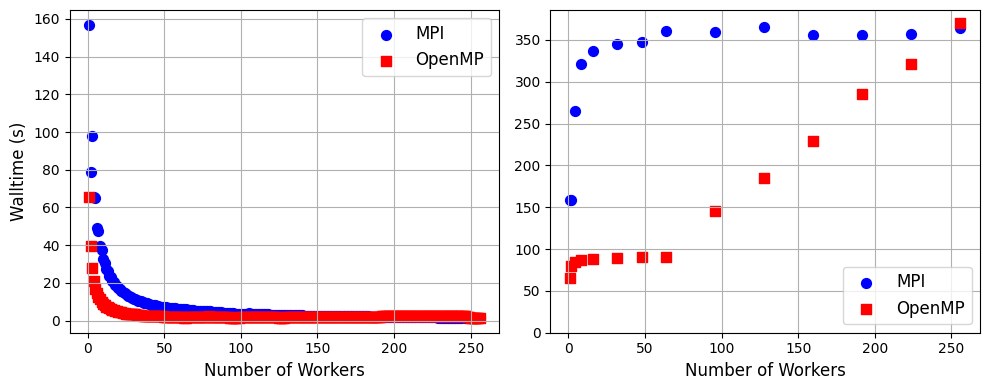

In [3]:
# Fontsize for various components
label_fontsize = 12
ticklabel_fontsize = 12
legend_fontsize = 12
box_annotation_fontsize = 12

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# plot the number of workers vs Walltime for MPI strong scaling
ax[0].scatter(strong_scaling_MPI['Workers'], strong_scaling_MPI['Walltime(s)'], label='MPI', 
              marker='o', color='blue', s=50)
# plot the number of workers vs Walltime for OMP strong scaling
ax[0].scatter(strong_scaling_OMP['Workers'], strong_scaling_OMP['Walltime(s)'], label='OpenMP', 
              marker='s', color='red', s=50)

ax[0].set_xlabel('Number of Workers', fontsize=label_fontsize)
ax[0].set_ylabel('Walltime (s)', fontsize=label_fontsize)
ax[0].grid()
ax[0].legend(fontsize=legend_fontsize)


# plot the number of workers vs walltime for MPI weak scaling
ax[1].scatter(weak_scaling_MPI['Workers'], weak_scaling_MPI['Walltime(s)'], label='MPI', 
              marker='o', color='blue', s=50)
# plot the number of workers vs walltime for OMP weak scaling
ax[1].scatter(weak_scaling_OMP['Workers'], weak_scaling_OMP['Walltime(s)'], label='OpenMP', 
              marker='s', color='red', s=50)

ax[1].set_xlabel('Number of Workers', fontsize=label_fontsize)
# ax[1].set_ylabel('Walltime (s)', fontsize=label_fontsize)
ax[1].set_ylim(bottom=0)
ax[1].grid()
ax[1].legend(fontsize=legend_fontsize)

plt.tight_layout()
plt.savefig('../plots/walltime-hybrid_scaling.png', dpi=600)
plt.show()

# Strong Scaling combined

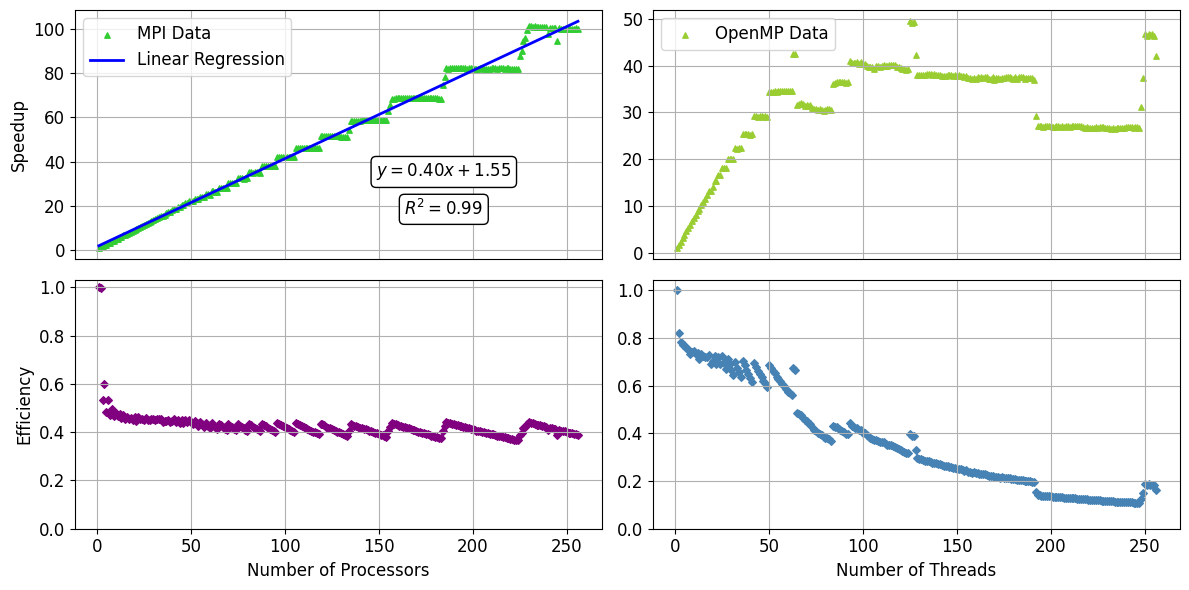

In [4]:
# Fontsize for various components
label_fontsize = 12
ticklabel_fontsize = 12
legend_fontsize = 12
box_annotation_fontsize = 12

# Plot the Speedup vs Workers and the Efficiency vs Workers for MPI
fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharey=False)

# First panel: Speedup vs Workers================================
# MPI data-------------------------------------
ax[0,0].scatter(strong_scaling_MPI['Workers'], strong_scaling_MPI['Speedup'], 
              marker='^', color='limegreen', s=15, label='MPI Data')

# Perform a linear regression for the speedup
x_MPI = strong_scaling_MPI['Workers']
y_MPI = strong_scaling_MPI['Speedup']
x_MPI = sm.add_constant(x_MPI)
model_MPI = sm.OLS(y_MPI, x_MPI).fit()

# Extract coefficients
intercept_MPI, slope_MPI = model_MPI.params

# Extract R-squared value
r_squared_MPI = model_MPI.rsquared

# Create the equation string
equation_str_MPI = f'$y = {slope_MPI:.2f}x + {intercept_MPI:.2f}$'


# Display the linear regression equation below the plot label
ax[0,0].annotate(equation_str_MPI, xy=(0.7, 0.35), xycoords='axes fraction', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                fontsize=box_annotation_fontsize, color='black')

# Display the R-squared value below the plot label
ax[0,0].annotate(f'$R^2 = {r_squared_MPI:.2f}$', xy=(0.7, 0.2), xycoords='axes fraction', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                fontsize=box_annotation_fontsize, color='black')

# plot the linear regression line
ax[0,0].plot(strong_scaling_MPI['Workers'], slope_MPI*strong_scaling_MPI['Workers'] + intercept_MPI, 
          color='blue', linestyle='-', linewidth=2, label='Linear Regression')

# OpenMP data-------------------------------------
ax[0,1].scatter(strong_scaling_OMP['Workers'], strong_scaling_OMP['Speedup'], 
              marker='^', color='yellowgreen', s=15, label='OpenMP Data')

ax[0,0].set_ylabel('Speedup', fontsize=label_fontsize)
ax[0,0].grid()
ax[0,1].grid()
ax[0,0].legend(fontsize=legend_fontsize)
ax[0,1].legend(fontsize=legend_fontsize)

# Remove x-axis labels and ticks for the first row
for axs in ax[0]:
    axs.set_xticklabels([])
    axs.tick_params(axis='x', which='both', bottom=False, top=False)

# Second panel: Efficiency vs Workers================================

# MPI data-------------------------------------

ax[1,0].scatter(strong_scaling_MPI['Workers'], strong_scaling_MPI['Efficiency'],
              marker='D', color='purple', label='MPI Data', s = 15)

# OpenMP data-------------------------------------
ax[1,1].scatter(strong_scaling_OMP['Workers'], strong_scaling_OMP['Efficiency'],
              marker='D', color='steelblue', label='OpenMP Data', s = 15)

ax[1,0].set_xlabel('Number of Processors', fontsize=label_fontsize)
ax[1,1].set_xlabel('Number of Threads', fontsize=label_fontsize)
ax[1,0].set_ylabel('Efficiency', fontsize=label_fontsize)
ax[1,0].grid()
ax[1,1].grid()
ax[1,0].set_ylim(bottom=0)
ax[1,1].set_ylim(bottom=0)

# Adjust fontsize for tick labels
for axis in ax.flat:
    for tick in axis.get_xticklabels() + axis.get_yticklabels():
        tick.set_fontsize(ticklabel_fontsize)


plt.tight_layout()
plt.savefig('../plots/strong_scaling-hybrid_scaling.png', dpi=600)

plt.show()


# Weak Scaling combined

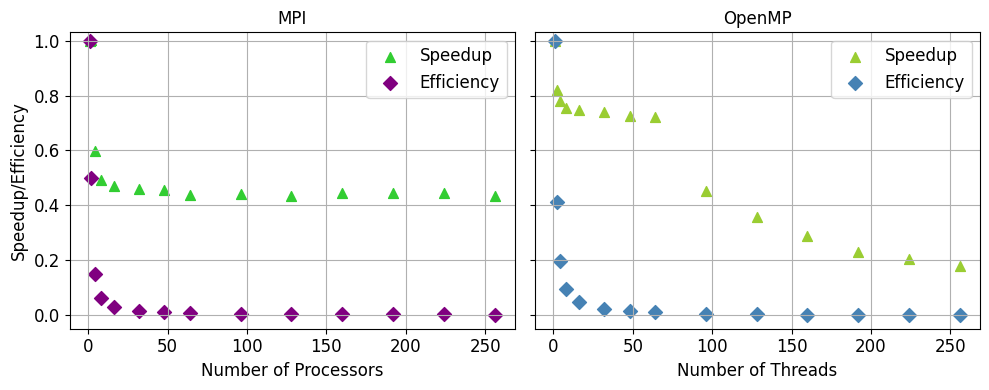

In [5]:
# Plot the Speedup vs Workers and the Efficiency vs Workers for MPI and OpenMP
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Speedup vs Workers================================
# MPI data-------------------------------------
ax[0].scatter(weak_scaling_MPI['Workers'], weak_scaling_MPI['Speedup'], 
              marker='^', color='limegreen', s=50, label='Speedup')
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel('Number of Processors', fontsize=label_fontsize)
ax[0].set_ylabel('Speedup', fontsize=label_fontsize)


# OpenMP data-------------------------------------
ax[1].scatter(weak_scaling_OMP['Workers'], weak_scaling_OMP['Speedup'], 
              marker='^', color='yellowgreen', s=50, label='Speedup')
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel('Number of Threads', fontsize=label_fontsize)

# Efficiency vs Workers================================

# MPI data-------------------------------------
ax[0].scatter(weak_scaling_MPI['Workers'], weak_scaling_MPI['Efficiency'],
            marker='D', color='purple', label='Efficiency', s=50)

# OpenMP data-------------------------------------
ax[1].scatter(weak_scaling_OMP['Workers'], weak_scaling_OMP['Efficiency'],
            marker='D', color='steelblue', label='Efficiency', s=50)

ax[0].set_ylabel('Speedup/Efficiency', fontsize=label_fontsize)
ax[0].grid()
ax[1].grid()
ax[0].legend(loc='upper right', fontsize=legend_fontsize)
ax[1].legend(loc='upper right', fontsize=legend_fontsize)

# Remove ticks from the second plot
# ax[1].set_yticks([])

# Set titles for the plots
ax[0].set_title('MPI', fontsize=label_fontsize)
ax[1].set_title('OpenMP', fontsize=label_fontsize)

# Adjust the y-axis limits
ax[0].set_ylim(bottom=-0.05)
ax[1].set_ylim(bottom=-0.05)

# Adjust fontsize for tick labels
for axis in ax:
    for tick in axis.get_xticklabels() + axis.get_yticklabels():
        tick.set_fontsize(ticklabel_fontsize)

plt.tight_layout()
plt.savefig('../plots/weak_scaling-hybrid_scaling.png', dpi=600)
plt.show()